In [5]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/dataSet/data_housing/housing.csv'
df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
print("Shape of dataset:", df.shape)

print("\nData types:\n", df.dtypes)
print("\nStatistical summary:\n", df.describe())

print("\nMissing values:\n", df.isnull().sum())

print("\nUnique values in 'ocean_proximity':", df['ocean_proximity'].unique())

Shape of dataset: (20640, 10)

Data types:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Statistical summary:
           longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.0000

In [7]:
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

print("Missing values after filling:\n", df.isnull().sum())


Missing values after filling:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


<ipython-input-7-954376088cff>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

X = df_encoded.drop('median_house_value', axis=1)
y = df_encoded['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_preds)
print("Linear Regression MSE:", lr_mse)

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_preds = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, dt_preds)
print("Decision Tree MSE:", dt_mse)


Linear Regression MSE: 4908476721.156616
Decision Tree MSE: 4771875804.934835


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, rf_preds)
print("Random Forest MSE:", rf_mse)


Random Forest MSE: 2395314930.144464


In [11]:
import joblib

joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model saved successfully.")


Model saved successfully.


In [12]:
sample = {
    'longitude': -122.0,
    'latitude': 37.5,
    'housing_median_age': 30,
    'total_rooms': 3000,
    'total_bedrooms': 500,
    'population': 1000,
    'households': 300,
    'median_income': 6,
    'ocean_proximity': 'NEAR BAY'
}

In [13]:
import pandas as pd
import numpy as np

sample = {
    'longitude': -122.0,
    'latitude': 37.5,
    'housing_median_age': 30,
    'total_rooms': 3000,
    'total_bedrooms': 500,
    'population': 1000,
    'households': 300,
    'median_income': 6,
    'ocean_proximity': 'NEAR BAY'
}

sample_df = pd.DataFrame([sample])

sample_encoded = pd.get_dummies(sample_df, columns=['ocean_proximity'])

for col in X.columns:
    if col not in sample_encoded.columns:
        sample_encoded[col] = 0

sample_encoded = sample_encoded[X.columns]

sample_scaled = scaler.transform(sample_encoded)

predicted_price = rf_model.predict(sample_scaled)

print(f"Predicted house price: ${predicted_price[0]:,.2f}")

Predicted house price: $336,162.08


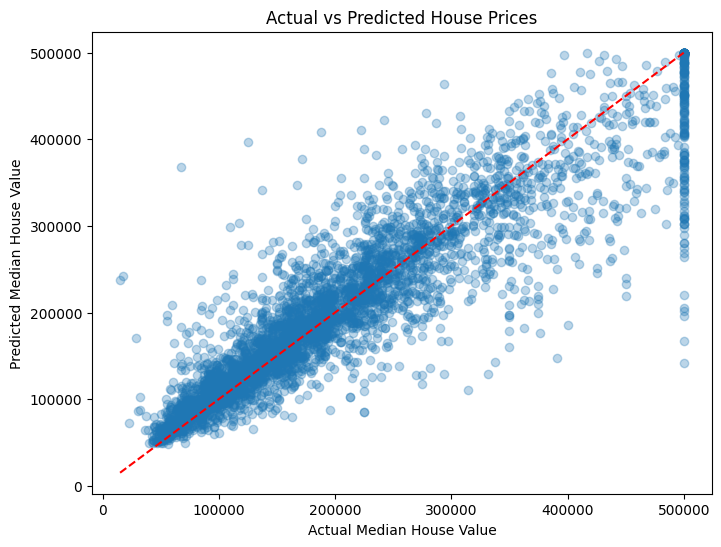

In [14]:
import matplotlib.pyplot as plt

rf_test_preds = rf_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_test_preds, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط الـ y=x
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [16]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.3/323.3 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [17]:
import gradio as gr
import pandas as pd
import numpy as np

def predict_price(longitude, latitude, housing_median_age, total_rooms, total_bedrooms,
                  population, households, median_income, ocean_proximity):

    sample = {
        'longitude': longitude,
        'latitude': latitude,
        'housing_median_age': housing_median_age,
        'total_rooms': total_rooms,
        'total_bedrooms': total_bedrooms,
        'population': population,
        'households': households,
        'median_income': median_income,
        'ocean_proximity': ocean_proximity
    }

    sample_df = pd.DataFrame([sample])
    sample_encoded = pd.get_dummies(sample_df, columns=['ocean_proximity'])

    for col in X.columns:
        if col not in sample_encoded.columns:
            sample_encoded[col] = 0

    sample_encoded = sample_encoded[X.columns]

    sample_scaled = scaler.transform(sample_encoded)

    prediction = rf_model.predict(sample_scaled)
    return f"${prediction[0]:,.2f}"

inputs = [
    gr.Number(label="Longitude", value=-122.0),
    gr.Number(label="Latitude", value=37.5),
    gr.Number(label="Housing Median Age", value=30),
    gr.Number(label="Total Rooms", value=3000),
    gr.Number(label="Total Bedrooms", value=500),
    gr.Number(label="Population", value=1000),
    gr.Number(label="Households", value=300),
    gr.Number(label="Median Income", value=6.0),
    gr.Dropdown(choices=['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], label="Ocean Proximity", value='NEAR BAY')
]

outputs = gr.Textbox(label="Predicted House Price")

gr.Interface(fn=predict_price, inputs=inputs, outputs=outputs, title="House Price Prediction").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5afff0dcbcecd861b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
